# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Type your code here
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv('/datalab/customer_data.csv')
df.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [ ]:
df.drop(['promotion_usage'], axis=1, inplace=True),
df.drop(['id'], axis=1, inplace=True)
df.drop(['education'], axis=1, inplace=True),
df.drop(['region'], axis=1, inplace=True),
df.drop(['loyalty_status'], axis=1, inplace=True),
df.head()

,age,gender,income,purchase_frequency,purchase_amount,product_category,satisfaction_score
0,27,Male,40682,frequent,18249,Books,6
1,29,Male,15317,rare,4557,Clothing,6
2,37,Male,38849,rare,11822,Clothing,6
3,30,Male,11568,frequent,4098,Food,7
4,31,Female,46952,occasional,19685,Clothing,5


In [ ]:
#Type your code here
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   purchase_frequency  100000 non-null  object
 4   purchase_amount     100000 non-null  int64 
 5   product_category    100000 non-null  object
 6   satisfaction_score  100000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 5.3+ MB


In [ ]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,age,income,purchase_amount,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,30.003260,27516.269880,9634.790840,5.009650
std,4.480535,12996.782587,4799.339449,1.038714
min,12.000000,5000.000000,1118.000000,0.000000
25%,27.000000,16271.750000,5583.000000,4.000000
50%,30.000000,27584.500000,9452.000000,5.000000
75%,33.000000,38747.250000,13350.000000,6.000000
max,49.000000,50000.000000,26204.000000,10.000000


# **3. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

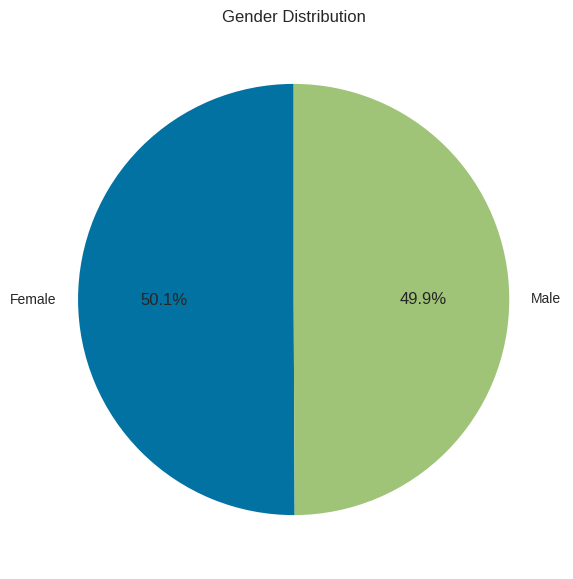

In [ ]:
#Type your code here
# Menghitung distribusi gender dan menampilkan pie chart untuk visualisasi
plt.figure(figsize=(7, 7))
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

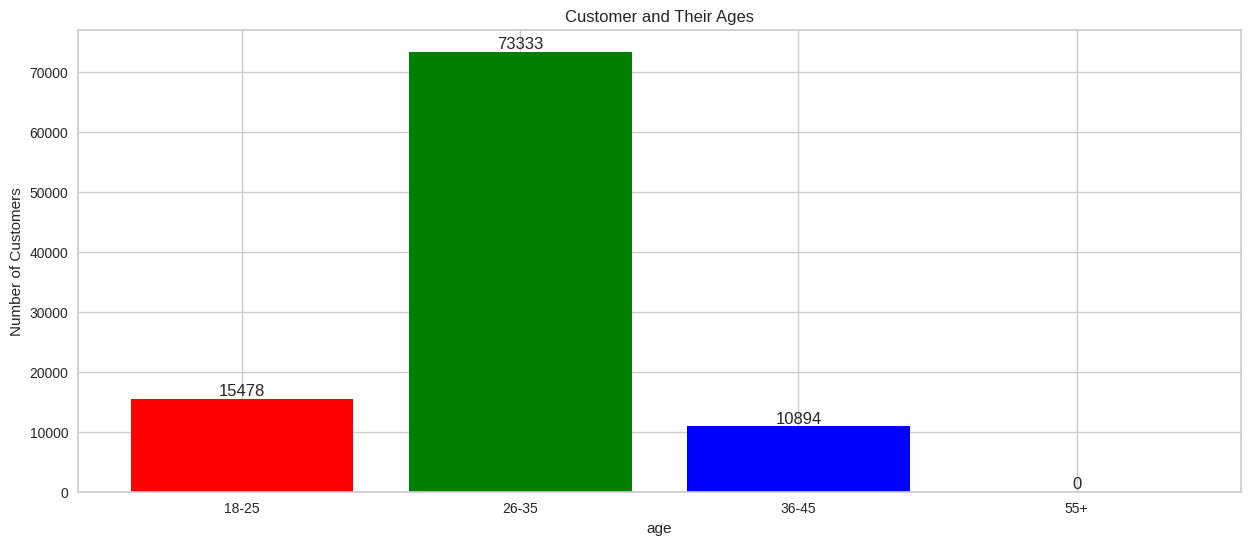

In [ ]:
# Mengelompokkan usia pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
age18_25 = df.age[(df.age >= 18) & (df.age <= 25)]
age26_35 = df.age[(df.age >= 26) & (df.age <= 35)]
age36_45 = df.age[(df.age >= 36) & (df.age <= 45)]
age55above = df.age[df.age >= 55]

# Menyusun data untuk plotting
x = ["18-25", "26-35", "36-45","55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age55above.values)]

# Membuat bar chart untuk distribusi usia pelanggan
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Membuat objek LabelEncoder
le = LabelEncoder()

# Mengubah kolom 'loyalty_status' menjadi numerik
df['purchase_frequency'] = le.fit_transform(df['purchase_frequency'])

# Menampilkan beberapa baris pertama DataFrame untuk memeriksa perubahan
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   purchase_frequency  100000 non-null  int64 
 4   purchase_amount     100000 non-null  int64 
 5   product_category    100000 non-null  object
 6   satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.3+ MB
None


In [ ]:
#Type your code here
X = df.iloc[:, [3, 2]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['purchase_frequency', 'purchase_amount']))

       purchase_frequency  purchase_amount
0                       0            40682
1                       2            15317
2                       2            38849
3                       0            11568
4                       1            46952
...                   ...              ...
99995                   1            19691
99996                   2            17428
99997                   0            13222
99998                   0            40093
99999                   2            22249

[100000 rows x 2 columns]


# **5. Pembangunan Model Clustering**

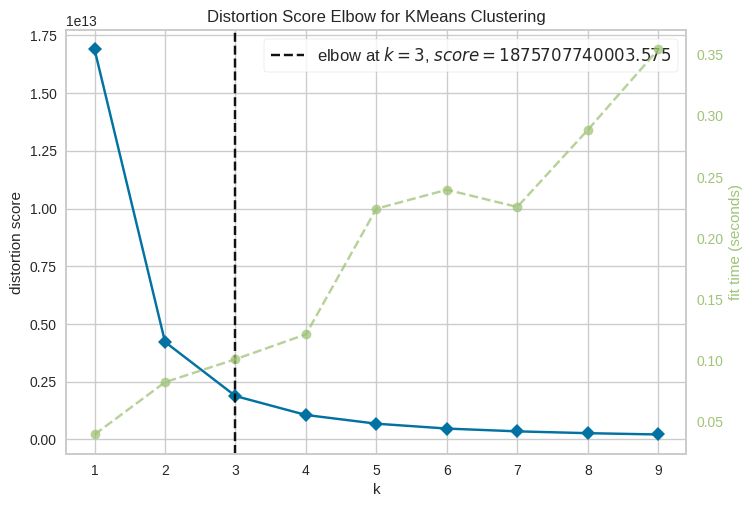

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_freq = cluster_data[:, 0].mean()
        mean_purchase = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Frekuensi: {mean_freq:.2f}")
        print(f"Rata-rata Purchase: {mean_purchase:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Frekuensi: 1.30
Rata-rata Purchase: 44398.07

Cluster 2:
Rata-rata Frekuensi: 1.29
Rata-rata Purchase: 21861.75

Cluster 3:
Rata-rata Frekuensi: 1.30
Rata-rata Purchase: 10568.34

Cluster 4:
Rata-rata Frekuensi: 1.31
Rata-rata Purchase: 33191.56


In [ ]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.5721046870426207


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

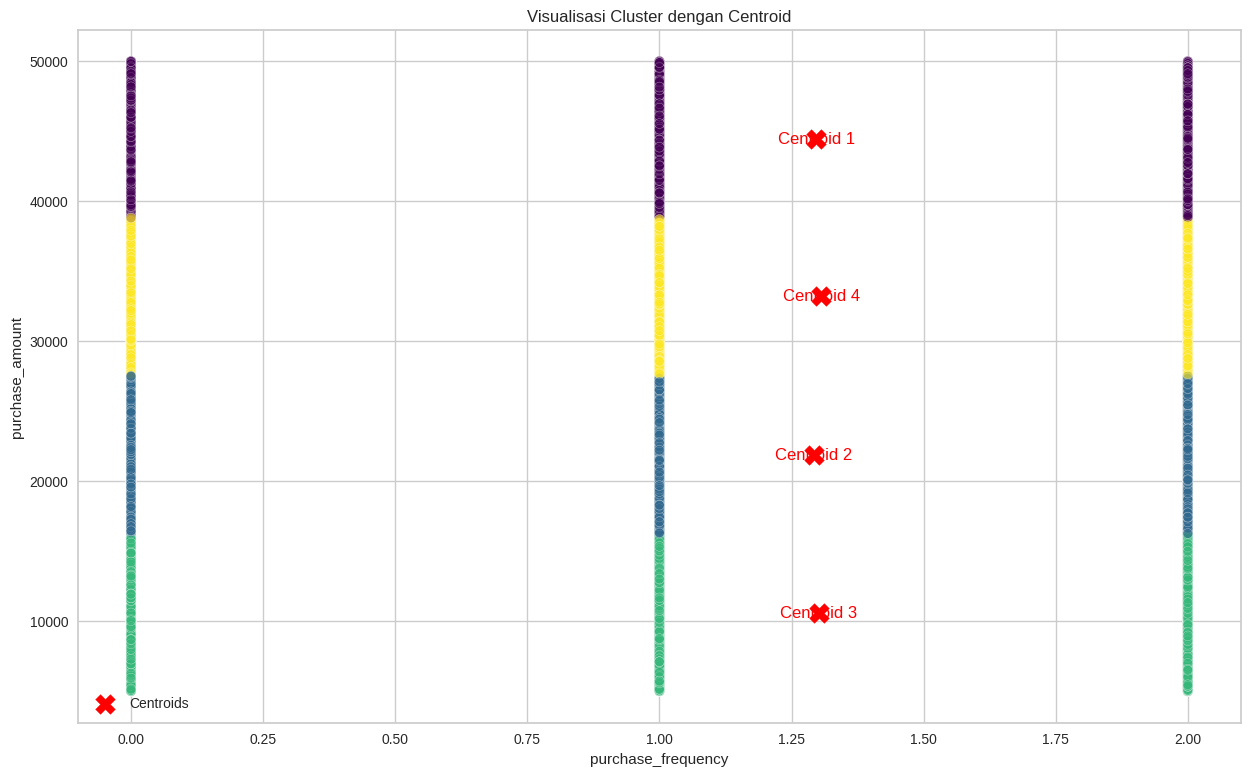

Nilai Centroids:
Centroid 1: Frekuensi = 1.30, Purchase Amount = 44419.63
Centroid 2: Frekuensi = 1.29, Purchase Amount = 21861.11
Centroid 3: Frekuensi = 1.30, Purchase Amount = 10560.62
Centroid 4: Frekuensi = 1.31, Purchase Amount = 33219.90


In [ ]:
#Type your code here
import matplotlib.pyplot as plt
import numpy as np

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(15, 9))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('purchase_frequency')
plt.ylabel('purchase_amount')
plt.legend()
plt.grid(True)
plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Frekuensi = {centroid[0]:.2f}, Purchase Amount = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Distribusi Data dalam Setiap Cluster
Berdasarkan hasil clustering, data telah dikelompokkan menjadi empat cluster berdasarkan Frekuensi pembelian dan Harga belanja. Berikut adalah karakteristik dan distribusi data di setiap cluster berdasarkan centroid yang diberikan:

1. Cluster 1:

    * Centroid: Frekuensi = 1.30, Purchase Amount = 44419.63
    * Karakteristik: Cluster ini memiliki frekuensi pembelian yang mirip dengan kluster lainnya (sekitar 1.30) tetapi dengan jumlah pembelian yang tertinggi (sekitar 44,419.63).Hal ini menunjukkan bahwa pelanggan dalam cluster ini mungkin tidak sering berbelanja, namun setiap kali berbelanja, mereka melakukan pembelian dalam jumlah besar.

2. Cluster 2:

    * Centroid: Frekuensi = 1.29, Purchase Amount = 21861.11
    * Karakteristik: Frekuensi pembelian di cluster ini hampir sama dengan cluster lainnya, namun jumlah pembelian mereka berada di tengah-tengah (sekitar 21,861.11). Ini menunjukkan bahwa pelanggan di cluster ini mungkin memiliki pola pembelian yang konsisten tetapi dalam jumlah sedang.

3. Cluster 3:

    * Centroid: Frekuensi = 1.30, Purchase Amount = 10560.62
    * Karakteristik: Frekuensi pembelian sama seperti cluster lainnya, namun jumlah pembelian paling rendah (sekitar 10,560.62). Pelanggan di cluster ini berbelanja dalam jumlah yang lebih kecil, mungkin menunjukkan segmen pelanggan dengan daya beli yang lebih rendah atau preferensi untuk pembelian kecil.

4. Cluster 4:

    * Centroid: Frekuensi = 1.31, Purchase Amount = 33219.90
    * Karakteristik: Frekuensi pembelian paling tinggi (1.31) meskipun perbedaannya kecil, dengan jumlah pembelian yang juga tinggi (sekitar 33,219.90). Ini menunjukkan bahwa pelanggan dalam cluster ini sedikit lebih sering berbelanja dan juga mengeluarkan uang dalam jumlah yang besar setiap kali berbelanja, meski tidak sebesar Cluster 1.

Analisis Lanjut :

* Segmentasi Berdasarkan Daya Beli:

    1. Cluster 1 dan Cluster 4 memiliki jumlah pembelian yang relatif tinggi. Hal ini dapat mengindikasikan pelanggan dengan daya beli yang lebih tinggi atau preferensi untuk berbelanja dalam jumlah besar. Strategi promosi atau produk premium dapat difokuskan pada dua cluster ini.
    2. Cluster 2 dan Cluster 3 memiliki jumlah pembelian yang lebih rendah, terutama Cluster 3, yang menunjukkan adanya kelompok pelanggan dengan daya beli rendah. Strategi diskon atau promosi bundling bisa lebih efektif untuk menarik pelanggan dalam cluster ini.

* Kesempatan untuk Meningkatkan Frekuensi Pembelian:

    Frekuensi pembelian di semua cluster cukup konsisten dan rendah, sekitar 1.3. Hal ini menunjukkan peluang untuk meningkatkan frekuensi pembelian melalui strategi pemasaran yang mendorong kunjungan berulang, seperti loyalty programs atau penawaran berbasis waktu (misalnya, diskon bulanan).

* Potensi untuk Penargetan Khusus:

    1. Cluster 1 bisa ditargetkan dengan produk-produk atau layanan kelas atas yang berharga tinggi, karena pelanggan di cluster ini cenderung melakukan pembelian besar.
    2. Cluster 4 juga dapat menerima penawaran serupa namun dengan opsi untuk pembelian lebih sering. Program langganan atau layanan berbasis keanggotaan dapat menarik pelanggan ini untuk berbelanja lebih sering.
    3. Cluster 3 mungkin lebih sensitif terhadap harga, sehingga promosi diskon atau penawaran dengan harga terjangkau bisa menjadi cara untuk mendorong lebih banyak pembelian dari kelompok ini.

* Strategi Berdasarkan Pengeluaran:

    Melalui pengetahuan tentang pembelian rata-rata setiap cluster, tim pemasaran dapat menyesuaikan rekomendasi produk dan layanan sesuai preferensi masing-masing kelompok pelanggan. Misalnya, produk bernilai tinggi dapat dipromosikan kepada Cluster 1 dan Cluster 4, sementara produk dengan harga lebih rendah dan promosi diskon dapat diarahkan pada Cluster 2 dan Cluster 3.

# **6. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
#eksport data Simpan hasilnya ke dalam file CSV.

import pandas as pd

# Assuming 'df' is your DataFrame and 'labels' are your cluster labels
# Create a new DataFrame with the original data and the cluster labels
df_with_clusters = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_with_clusters['Cluster'] = labels

# Export the DataFrame to a CSV file
df_with_clusters.to_csv('/datalab/hasil_cluster.csv', index=False)